In [1]:
%matplotlib qt

In [1]:
%matplotlib notebook

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, ImageMagickWriter
import matplotlib.cm as cm
import numpy as np

In [4]:
def rot(a, v):
    R = np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])
    return np.dot(R, v)

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
ax.axis('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_facecolor('k')
r = 0.0
R = 4
R2 =4
N = 15
a = np.pi/N

#circle_patch = patches.Circle((0, 0), radius = r-0.1, color = 'w', linewidth=0)  
#ax.add_patch(circle_patch)

u0 = np.array([R*np.cos(a)-r, R*np.sin(a)])
v0 = np.array([R*np.cos(a)-r, (-1)*R*np.sin(a)])
w0 = np.array([R2, 0])

petals = []
shift = np.array([r, 0]).reshape(2, 1)
for i in range(N):
    t = 0.5*np.sin(2*np.pi*i/N - np.pi/2) + 0.5
    du0 = np.sum(u0**2)**0.5
    u = (1-t)*u0 + t*v0
    v = (1-t)*v0 + t*u0
    d = np.linalg.det(np.vstack((u, v)))
    #xy = np.array([[0, 0],list(u),list(v),[0,0]]).T
    xy = np.array([[0, 0],list(u),list(w0),list(v),[0,0]]).T
    xx = rot(2*a*i, xy+shift)
    p, = ax.fill(xx[0], xx[1], linewidth=0)
    petals.append(p)
if d > 0:
    petals[i].set_fc(np.array([1, 0, 0])*t**2)
    petals[i].set_zorder(10*t)
else:
    petals[i].set_fc(np.array([0, 1, 0])*(1-t)**2)
    petals[i].set_zorder(-10*t)


def update_plot(s):
    global petals, N, u0, v0, w0
    for i in range(N):
        t = (0.5*np.sin(2*np.pi*i/N - np.pi/2 + s) + 0.5)
        u = (1-t)*u0 + t*v0
        v = (1-t)*v0 + t*u0
        d = np.linalg.det(np.vstack((u, v)))
        #xy = np.array([[0, 0],list(u),list(v),[0,0]]).T
        xy = np.array([[0, 0],list(u),list(w0),list(v),[0,0]]).T
        xx = rot(2*a*i, xy+shift)
        petals[i].set_xy(xx.T)
        if d > 0:
            petals[i].set_fc(np.array([1, 0, 0])*t**2)
            petals[i].set_zorder(10*t)
        else:
            petals[i].set_fc(np.array([0, 1, 0])*(1-t)**2)
            petals[i].set_zorder(-10*t)
    return petals
    
ani = FuncAnimation(fig, func = update_plot, frames=np.linspace(0, 2*np.pi, 200), interval=10, blit=True, repeat=True)

plt.show()

<IPython.core.display.Javascript object>


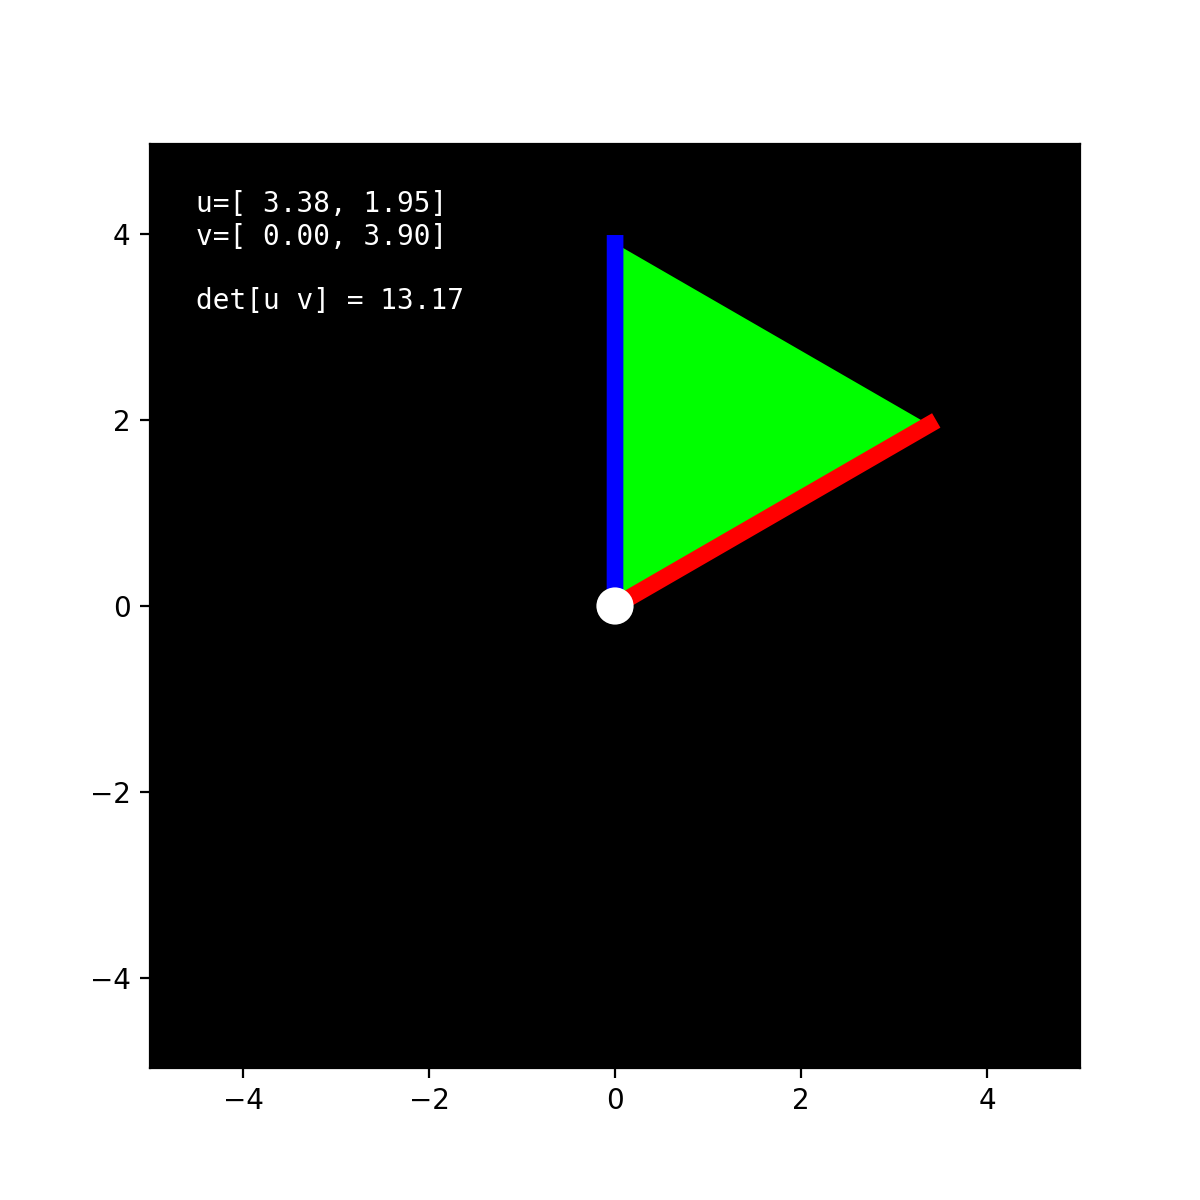

In [10]:
def rot(a, v):
    R = np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])
    return np.dot(R, v)

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
ax.axis('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_facecolor('k')
r = 0
R = 3.9
R2 = 3
N = 6
a = np.pi/N

circle_patch = patches.Circle((0, 0), radius = 0.2, color = 'w', linewidth=0, zorder=20)  
ax.add_patch(circle_patch)

u0 = np.array([R*np.cos(a)-r, R*np.sin(a)])
v0 = np.array([R*np.cos(a)-r, (-1)*R*np.sin(a)])
w0 = np.array([R2, 0])

petals = []
shift = np.array([r, 0]).reshape(2, 1)
xy = np.array([[0, 0],list(u0),list(v0),[0,0]]).T
xy = rot(np.pi/3, xy)
p, = ax.fill(xy[0], xy[1], linewidth=0, zorder= -20)
pu, = ax.plot(xy[0, 0:2], xy[1, 0:2], 'r', lw = 6, zorder=10)
pv, = ax.plot(xy[0, [0,2]], xy[1, [0,2]], 'b', lw = 6, zorder=0)
p.set_fc([1,1,1])
d = np.linalg.det(np.vstack((u0, v0)))
text = ax.text(0.05, 0.95,
        'u=[{:5.2f},{:5.2f}]\nv=[{:5.2f},{:5.2f}]\n\ndet[u v] = {:.2f}'.format(u0[0],u0[1],v0[0],v0[1],d),
        transform=ax.transAxes,
        color='w',
        family = 'monospace',
        verticalalignment = 'top',
        )


def update_plot(s):
    global p, u0, v0, w0, d0
    t = (0.5*np.sin(- np.pi/2 + s) + 0.5)
    u = (1-t)*u0 + t*v0
    v = (1-t)*v0 + t*u0
    d = np.linalg.det(np.vstack((u, v)))
    xy = np.array([[0, 0],list(u),list(v),[0,0]]).T
    xy = rot(np.pi/3, xy)
    p.set_xy(xy.T)
    pu.set_data(xy[0, 0:2], xy[1, 0:2])
    pv.set_data(xy[0, [0,2]], xy[1, [0,2]])
    text.set_text('u=[{:5.2f},{:5.2f}]\nv=[{:5.2f},{:5.2f}]\n\ndet[u v] = {:.2f}'.format(xy[0,1],xy[1,1],xy[0,2],xy[1,2],d))
    if d > 0:
        p.set_fc(np.array([0, 1, 0])*t**2)
    else:
        p.set_fc(np.array([1,1,1])*(1-t)**2)
    if d < 0.9*d0:
        pu.set_zorder(10)
        pv.set_zorder(0)
    elif d > -0.9*d0:
        pu.set_zorder(0)
        pv.set_zorder(10)
    return p, pu, pv
    
ani = FuncAnimation(fig, func = update_plot, frames=np.linspace(0, 2*np.pi, 100), interval=50, blit=True, repeat=True)

plt.show()